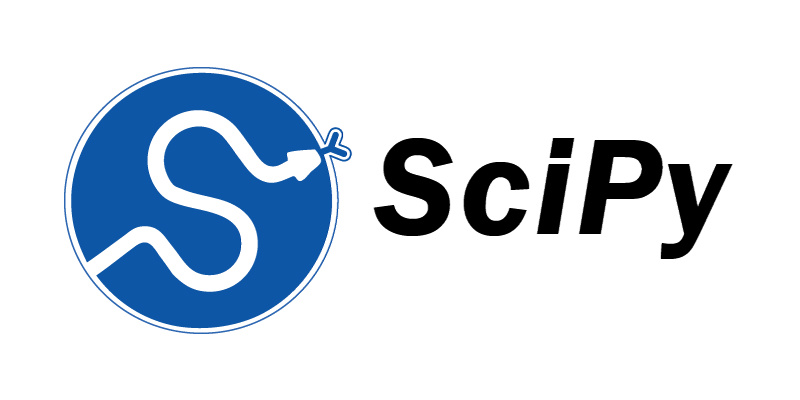

# Funciones de distribución de probabilidad

En este colab aprenderán como usar la librería **Scipy** y sus distribuciones de probabilidad. Scipy es una libreria basada en NumPy para ciencias e ingeniería. Contiene módulos especializados en álgebra lineal, integración, interpolación, funciones especiales, FFT, optimización, estadística, entre otros.

Particularmente, trabajaremos con el módulo **stats**:

In [ ]:
from scipy import stats # importamos el módulo stats
import numpy as np
import matplotlib.pyplot as plt

El módulo stats nos permite trabajar con funciones de distribución tanto discretas como contínuas. Algunas de estas distribuciones son:

- Discretas: Bernoulli, Binomial, Geometrica, etc.
- Continuas: $\alpha$, $\chi^2$, Exponencial, Normal, etc.

En la [documentación](https://docs.scipy.org/doc/scipy/reference/stats.html) pueden revisar la lista completa de distribuciones de probabilidad

### **PDF, CDP y Sampling**

Ahora veremos como, dada una función distribución, podemos ver su función de probabilidad (PDF), función de probabilidad acumulada (CDF), ademas de generar una muestra aleatoria (Sampling). Para este ejemplo usaremos una distribución **$\chi^2$**.

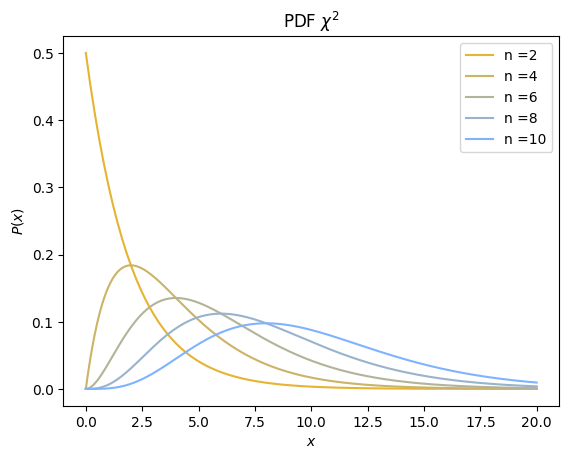

In [ ]:
# Ploteamos chi2 para distintos n (grados de libertad)

x = np.linspace(0, 20, 200) # arreglo eje x
n_array = np.arange(2, 11, 2)

for i in n_array:
  Chi2_i = stats.chi2(df=i)
  plt.plot(x, Chi2_i.pdf(x), color = (1-0.05*i, 0.7, 0.1*i), label=f'n ={i}') # Función de probabilidad

plt.title(f'PDF $\chi^2$')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.legend(loc = 'upper right')
plt.show()

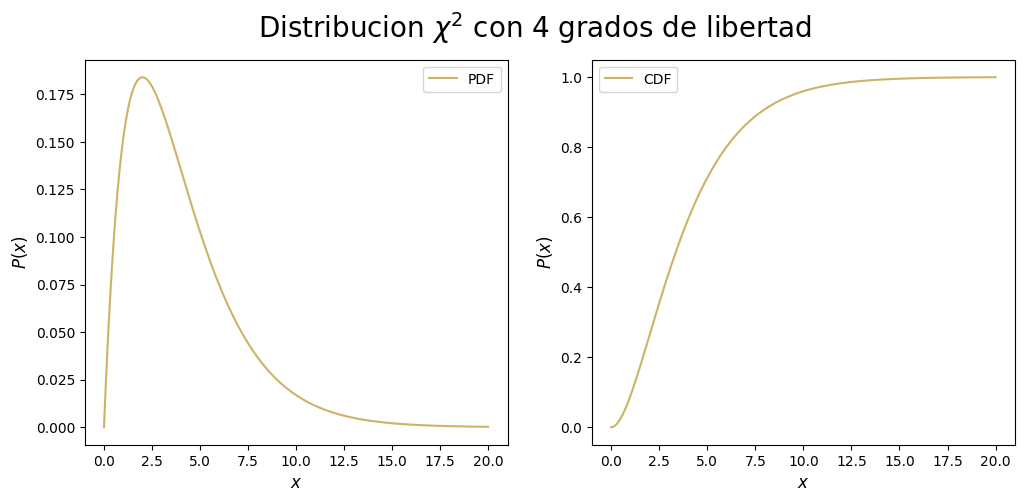

In [ ]:
# Generamos la distribución
n = n_array[1]
Chi2 = stats.chi2(df=n)

fig = plt.figure(figsize=(12,5))
fig.suptitle(f'Distribucion $\chi^2$ con {n} grados de libertad', fontsize=20)

plt.subplot(1, 2, 1) # Graficamos en la posición (0, 0) de la grilla
plt.plot(x, Chi2.pdf(x),color = (1-0.05*n, 0.7, 0.1*n), label='PDF') # Función de probabilidad
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$P(x)$', fontsize=12)
plt.legend(loc = 'upper right')


plt.subplot(1, 2, 2) # Graficamos en la posición (1, 0) de la grilla
plt.plot(x, Chi2.cdf(x),color = (1-0.05*n, 0.7, 0.1*n), label='CDF') # Función acumulada
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$P(x)$', fontsize=12)
plt.legend(loc = 'upper left')


plt.show()


Finalmente, generaremos una muestra y veremos que efectivamente tiene una distribución de $\chi^2$

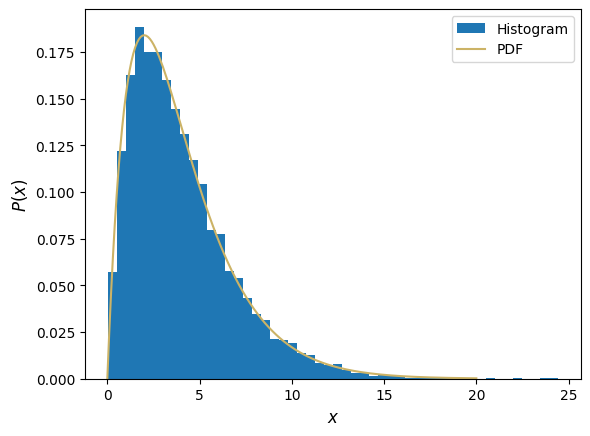

In [ ]:
muestra = Chi2.rvs(size=10000)
plt.hist(muestra, bins=50, density=True, label = 'Histogram')
plt.plot(x, Chi2.pdf(x),color = (1-0.05*n, 0.7, 0.1*n), label='PDF') # Función de probabilidad
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$P(x)$', fontsize=12)
plt.legend(loc = 'upper right')

# Demostración del TLC

Ahora demostraremos de manera experimental el teorema del limite central visto en clases. Para esto:



1.   Seleccionamos una funcion distribución.
2.   Generamos $N$ muestras aleatorias de tamaño $n$.
3.   Graficamos un histograma a la media de las muestras.
4.   Graficamos una distribución gausiana con media $\mu_m = \mu$ y varianza $\sigma_m = \frac{\sigma}{\sqrt{n}}$ sobre el histograma, con $\mu$ y $\sigma$ la media y desviacion de la distribución.

Seleccionaremos la distribución de poisson:

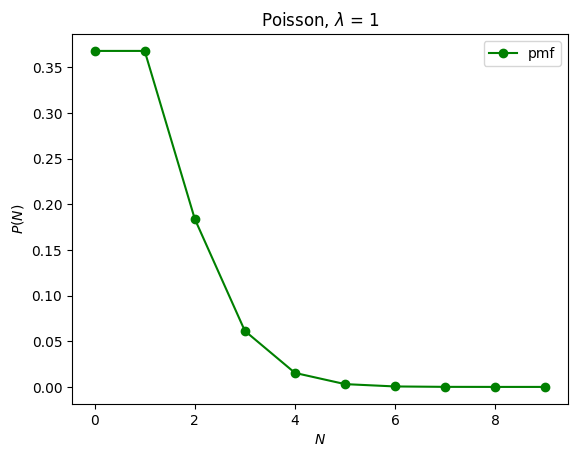

In [ ]:
lmd = 1
poisson = stats.poisson(mu=lmd)
x = np.arange(0, 10, 1)
plt.plot(x, poisson.pmf(x), '-o', color = 'g', label='pmf')
plt.title(f'Poisson, $\lambda$ = {lmd}')
plt.xlabel('$N$')
plt.ylabel('$P(N)$')
plt.legend(loc = 'upper right')
plt.show()

Generamos muestras aleatorias y calculamos sus medias

In [ ]:
N_muestras = 5000 # Numero de muestras aleatorias
L_muestras = 30 # Largo de cada muestra aleatoria

Medias = [] # lista para almacenar muestras
for i in range(N_muestras):
  muestra = poisson.rvs(size=L_muestras)
  Medias.append(np.mean(muestra))

Medias = np.array(Medias)

# Almacenamos media y desviacion de la distribución
sigma = poisson.std()/np.sqrt(L_muestras)
mu = poisson.mean()

Graficamos un histograma y una función gausiana encima

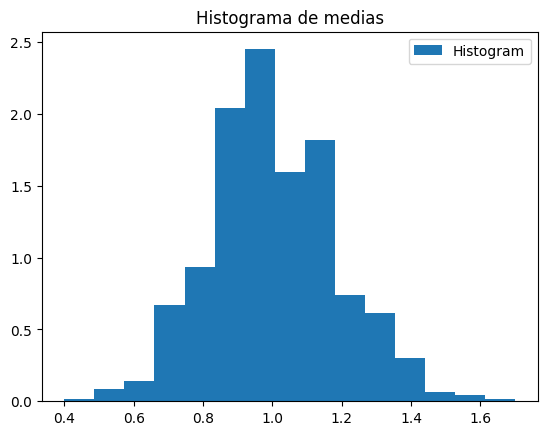

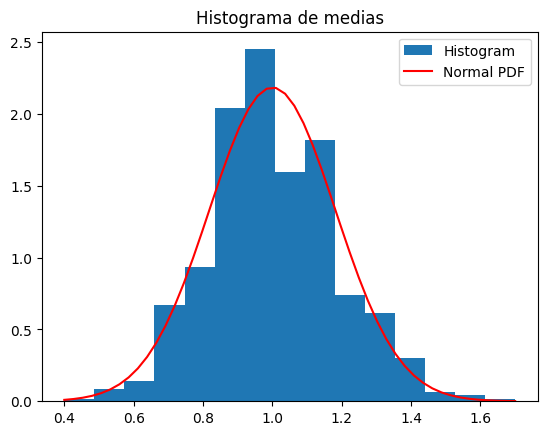

In [ ]:
# Histograma de medias
plt.hist(Medias, bins=15, density=True, label = 'Histogram')
plt.legend(loc = 'upper right')
plt.title(f'Histograma de medias')
plt.show()

# funcion normal
x = np.linspace(0.4, 1.7)
norm = stats.norm(loc=mu, scale=sigma)

plt.hist(Medias, bins=15, density=True, label = 'Histogram')
plt.plot(x, norm.pdf(x), color = 'r', label='Normal PDF')
plt.legend(loc = 'upper right')
plt.title(f'Histograma de medias')
plt.show()